In [1]:
# !conda install pandas

^C


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("postgres_scripts/NIFTY_dataset.xlsx")
df.head()

,id,date,context,news,conversations,label,pct_change
0,nifty_0,2010-01-06,"date,open,high,low,close,adj_close,volume,pct_...",China Officials Likely Knew of Bad Milk\nSony'...,"[{'role': 'user', 'value': ""Project the $SPY i...",Neutral,0.0042
1,nifty_1,2010-01-07,"date,open,high,low,close,adj_close,volume,pct_...",Britain Set for Next Step on Wind Power\nJourn...,"[{'role': 'user', 'value': ""Analyze market dat...",Neutral,0.0033
2,nifty_2,2010-01-11,"date,open,high,low,close,adj_close,volume,pct_...","HK, China stocks rise on reforms; brokerages s...","[{'role': 'user', 'value': 'Forecast the $SPY ...",Fall,-0.0093
3,nifty_3,2010-01-12,"date,open,high,low,close,adj_close,volume,pct_...",DemandTec Names Retail Challenge Grand Final W...,"[{'role': 'user', 'value': 'Forecast the $SPY ...",Rise,0.0084
4,nifty_4,2010-01-13,"date,open,high,low,close,adj_close,volume,pct_...",Gear Malfunction Suspected in United Jet Incid...,"[{'role': 'user', 'value': 'Forecast the $SPY ...",Neutral,0.0027


In [3]:
print(df['news'].iloc[1])


Britain Set for Next Step on Wind Power
Journal Register Taps Paton as CEO
Crude Settles
		
	Below $83
Gold Pressured by Dollar
European Stocks Trade in Tight Ranges
Shanghai Slides on PBOC Move
Reliance MediaWorks Buys Film Processing Firm ilab UK
Exchange Tightens ChiNext Rules
Prudential to Buy UOB Unit
Dollar, Commodities Break Usual Tie
Small Banks Say a Cure Hurts
Music Sales Sink Further
Mesa Air Files Chapter 11
Dollar Slide Deepens After Fed Minutes
U.S. Airlines Claw Back
Symetra Gets 2010 IPO Market Rolling
Aberdeen Leads Race Over RBS Unit
Judge Ends Lawsuit Against Wells Fargo
U.K.'s Gas Buffers Struggle With Cold
U.S. Now a Renters' Market
FDIC Weighs Tying Fees to Banks' Pay


In [4]:
from helpers.clean_data import IndianNewsDataCleaner


In [5]:
cleaner = IndianNewsDataCleaner(df, country='India', label='label')


In [6]:
df_clean = (
        cleaner
        .map_sentiment()
        .split_rows_in_pairs()
        .add_country()
        .clean_text()
        .filter_data()
        .get_clean_data()
    )
print(df.shape)

Before splitting rows:
  Count: 1477
  Min length: 369
  Max length: 32767
  Mean length: 9559.95

After splitting rows:
  Count: 231060
  Min length: 1
  Max length: 278
  Mean length: 60.09

Before filtering by length:
  Count: 192654
  Min length: 0
  Max length: 265
  Mean length: 59.90

After filtering by length:
  Count: 72773
  Min length: 61
  Max length: 265
  Mean length: 86.92

(1477, 7)


In [7]:
df_clean.head()

,text,label
52,penpowers worldcard mobile application scans b...,0
59,forex-euro at 3-wk high as dollar nurses losse...,0
60,hkbn shatters the millionth subscription mark ...,0
69,"money markets-australia, china see stronger ca...",0
70,"treasuries-dip as asia stocks jump, yield curv...",0


In [8]:
df_clean.label.value_counts()

label
1    38411
2    20818
0    13544
Name: count, dtype: int64

In [31]:
df_clean['word_count'] = df_clean['text'].apply(lambda x: len(str(x).split()))

# Char counts
df_clean['char_count'] = df_clean['text'].apply(len)

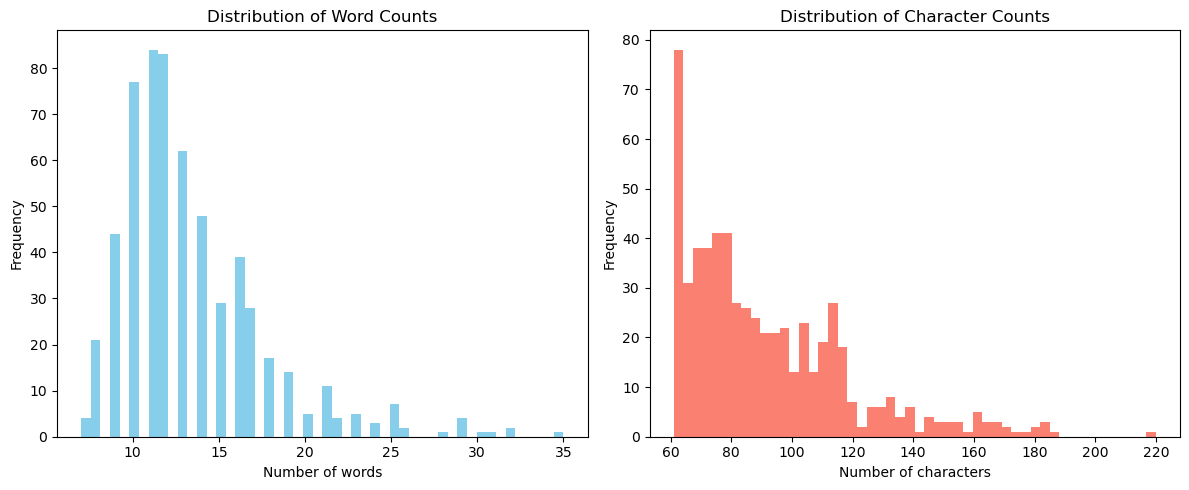

In [32]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(df['word_count'], bins=50, color='skyblue')
plt.title('Distribution of Word Counts')
plt.xlabel('Number of words')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
plt.hist(df['char_count'], bins=50, color='salmon')
plt.title('Distribution of Character Counts')
plt.xlabel('Number of characters')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [33]:
print("Word count stats:")
print(df_clean['word_count'].describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95]))

print("\nCharacter count stats:")
print(df_clean['char_count'].describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95]))

Word count stats:
count    72773.000000
mean        12.746376
std          4.144056
min          6.000000
25%         10.000000
50%         12.000000
75%         14.000000
90%         18.000000
95%         21.000000
max         44.000000
Name: word_count, dtype: float64

Character count stats:
count    72773.000000
mean        86.915710
std         28.660618
min         61.000000
25%         66.000000
50%         76.000000
75%         98.000000
90%        127.000000
95%        148.000000
max        265.000000
Name: char_count, dtype: float64


In [36]:
print(df_clean.columns)

Index(['text', 'label', 'word_count', 'char_count'], dtype='object')


In [37]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72773 entries, 52 to 231059
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        72773 non-null  object
 1   label       72773 non-null  int64 
 2   word_count  72773 non-null  int64 
 3   char_count  72773 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [38]:
df_clean['label'].value_counts()

label
1    38411
2    20818
0    13544
Name: count, dtype: int64

In [39]:
df_clean.isna().sum()

text          0
label         0
word_count    0
char_count    0
dtype: int64

In [41]:
df_clean.head()

,text,label,word_count,char_count
52,penpowers worldcard mobile application scans business cards into the iphone,0,10,75
59,forex-euro at 3-wk high as dollar nurses losses after jobs data,0,11,63
60,hkbn shatters the millionth subscription mark driven by strong broadband subscription...,0,11,88
69,"money markets-australia, china see stronger case for rate hikes",0,9,63
70,"treasuries-dip as asia stocks jump, yield curve steepest ever",0,9,61


In [42]:
df_clean.shape

(72773, 4)

<Axes: xlabel='label'>

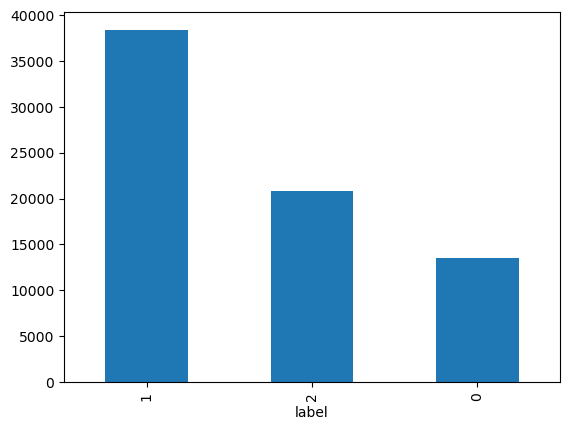

In [44]:
df_clean['label'].value_counts().plot(kind = 'bar')

In [22]:
df.tail()

,id,date,context,news,conversations,label,pct_change,word_count,char_count
1472,nifty_1472,2017-06-20,"date,open,high,low,close,adj_close,volume,pct_...",Court Denies States’ Request for Leftover Mone...,"[{'role': 'user', 'value': ""Assess market data...",Neutral,-0.0002,NaN,NaN
1473,nifty_1473,2017-06-21,"date,open,high,low,close,adj_close,volume,pct_...",BOJ Deputy Gov Sees No Need to Increase Rates ...,"[{'role': 'user', 'value': ""To predict the dir...",Neutral,-0.0005,NaN,NaN
1474,nifty_1474,2017-06-22,"date,open,high,low,close,adj_close,volume,pct_...",Big Pharma Plays It Safe on Senate Health Bill...,"[{'role': 'user', 'value': ""Predict the $SPY i...",Neutral,0.0012,NaN,NaN
1475,nifty_1475,2017-06-26,"date,open,high,low,close,adj_close,volume,pct_...",CFO Tries to Keep Cycling Company From Spinnin...,"[{'role': 'user', 'value': ""Project the $SPY i...",Fall,-0.0081,NaN,NaN
1476,nifty_1476,2017-06-27,"date,open,high,low,close,adj_close,volume,pct_...",MSCI Already Talking About Adding More Chinese...,"[{'role': 'user', 'value': ""To predict the dir...",Rise,0.0090,NaN,NaN


In [46]:
# Character count
df_clean['char_length'] = df_clean['text'].str.len()
df_clean['token_length'] = df_clean['text'].str.split().apply(len)

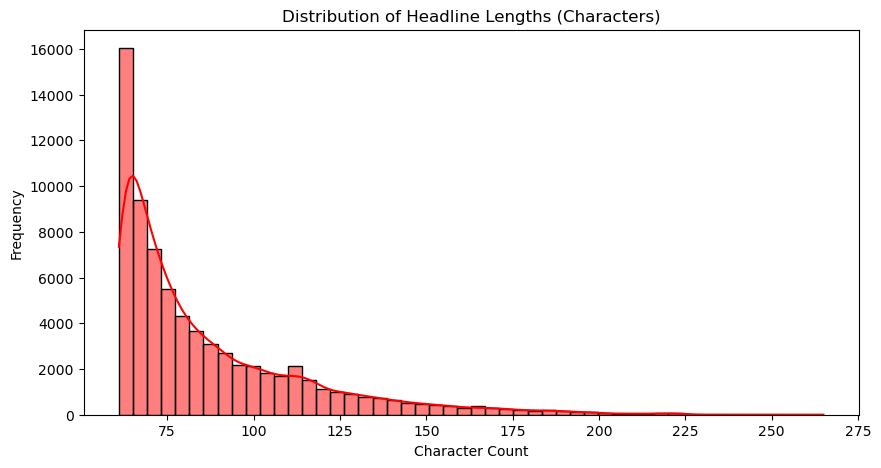

In [48]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df_clean, x='char_length', bins=50, kde=True, color='r')
plt.title('Distribution of Headline Lengths (Characters)')
plt.xlabel('Character Count')
plt.ylabel('Frequency')
plt.show()

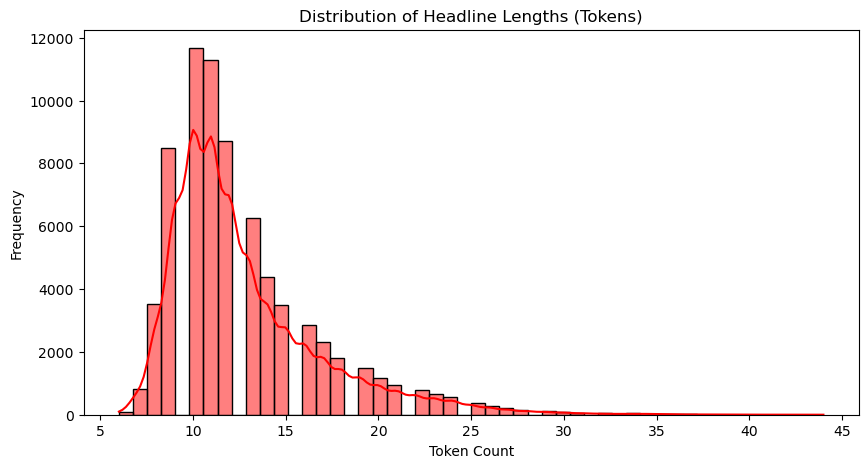

In [49]:
# Token length histogram
plt.figure(figsize=(10, 5))
sns.histplot(df_clean['token_length'], bins=50, kde=True, color='r')
plt.title('Distribution of Headline Lengths (Tokens)')
plt.xlabel('Token Count')
plt.ylabel('Frequency')
plt.show()

In [50]:
df_clean[df_clean['char_length'] >= 30].shape

(72773, 6)

In [51]:
df_clean['country'] = 'India'

In [52]:
df_clean.head()

,text,label,word_count,char_count,char_length,token_length,country
52,penpowers worldcard mobile application scans business cards into the iphone,0,10,75,75,10,India
59,forex-euro at 3-wk high as dollar nurses losses after jobs data,0,11,63,63,11,India
60,hkbn shatters the millionth subscription mark driven by strong broadband subscription...,0,11,88,88,11,India
69,"money markets-australia, china see stronger case for rate hikes",0,9,63,63,9,India
70,"treasuries-dip as asia stocks jump, yield curve steepest ever",0,9,61,61,9,India


C:\Users\sande\AppData\Local\Temp\ipykernel_21480\3990568563.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x='label', palette='flare' )


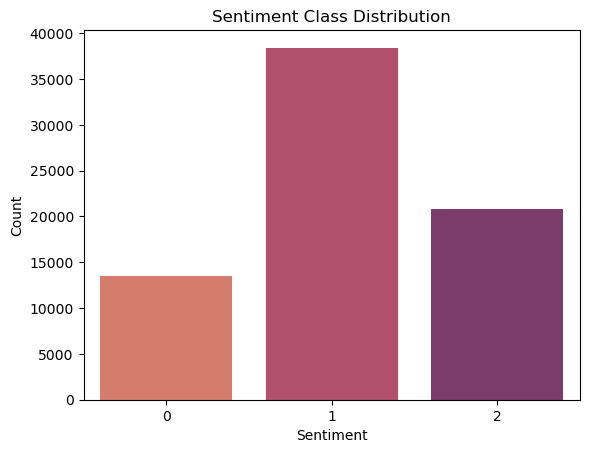

label
1    52.781938
2    28.606763
0    18.611298
Name: proportion, dtype: float64


In [54]:
sns.countplot(data=df_clean, x='label', palette='flare' )
plt.title("Sentiment Class Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

print(df_clean['label'].value_counts(normalize=True) * 100)

In [55]:
df_clean.head()

,text,label,word_count,char_count,char_length,token_length,country
52,penpowers worldcard mobile application scans business cards into the iphone,0,10,75,75,10,India
59,forex-euro at 3-wk high as dollar nurses losses after jobs data,0,11,63,63,11,India
60,hkbn shatters the millionth subscription mark driven by strong broadband subscription...,0,11,88,88,11,India
69,"money markets-australia, china see stronger case for rate hikes",0,9,63,63,9,India
70,"treasuries-dip as asia stocks jump, yield curve steepest ever",0,9,61,61,9,India
